In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings("ignore")

# Load dataset
file_path = 'RetailandWhereHouseSale2.csv'  
df = pd.read_csv(file_path)

# Data Cleaning
df['SUPPLIER'].fillna('UNKNOWN', inplace=True)
df['RETAIL_SALES'].fillna(df['RETAIL_SALES'].median(), inplace=True)

# Remove negative values for sales-related columns
sales_columns = ['RETAIL_SALES', 'RETAIL_TRANSFERS', 'WAREHOUSE_SALES']
for col in sales_columns:
    df[col] = np.where(df[col] < 0, 0, df[col])

# Add a log-transformed column for Retail Sales
df['Log_Retail_Sales'] = np.log1p(df['RETAIL_SALES'])

df.head(10)

,YEAR,MONTH,SUPPLIER,ITEM_CODE,ITEM_DESCRIPTION,ITEM_TYPE,RETAIL_SALES,RETAIL_TRANSFERS,WAREHOUSE_SALES,Log_Retail_Sales
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,0.000000
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,0.000000
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,0.000000
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,0.000000
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,0.598837
5,2020,1,KYSELA PERE ET FILS LTD,100641,CORTENOVA VENETO P/GRIG - 750ML,WINE,2.76,0.0,6.0,1.324419
6,2020,1,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.08,1.0,1.0,0.076961
7,2020,1,BROWN-FORMAN BEVERAGES WORLDWIDE,1008,JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...,BEER,0.00,0.0,2.0,0.000000
8,2020,1,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,6.41,4.0,0.0,2.002830
9,2020,1,INTERNATIONAL CELLARS LLC,101117,KSARA CAB - 750ML,WINE,0.33,1.0,2.0,0.285179


In [2]:
# Descriptive Statistics
print("Missing values:", df.isnull().sum())
print("Descriptive Statistics:\n", df.describe())

# Levene's Test for equality of variances
levene_stat, levene_p = levene(df['Log_Retail_Sales'], df['WAREHOUSE_SALES'])
print(f"Levene's Test p-value: {levene_p}")

# Two-Way ANOVA
model = ols('Log_Retail_Sales ~ C(MONTH) + C(ITEM_TYPE) + C(MONTH):C(ITEM_TYPE)', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print("\nTwo-Way ANOVA Results:\n", anova_results)

# Tukey's HSD Test
tukey = pairwise_tukeyhsd(df['Log_Retail_Sales'], df['ITEM_TYPE'], alpha=0.05)
print("\nTukey's HSD Test Results:\n", tukey)

# Shapiro-Wilk Test for normality
shapiro_stat, shapiro_p = shapiro(model.resid)
print(f"\nShapiro-Wilk Test p-value: {shapiro_p}")
if shapiro_p < 0.05:
    print("Residuals are not normally distributed.")


Missing values: YEAR                0
MONTH               0
SUPPLIER            0
ITEM_CODE           0
ITEM_DESCRIPTION    0
ITEM_TYPE           0
RETAIL_SALES        0
RETAIL_TRANSFERS    0
WAREHOUSE_SALES     0
Log_Retail_Sales    0
dtype: int64
Descriptive Statistics:
           YEAR         MONTH  RETAIL_SALES  RETAIL_TRANSFERS  WAREHOUSE_SALES  \
count  30000.0  30000.000000  30000.000000      30000.000000     30000.000000   
mean    2020.0      3.911467      6.939615          6.594904        27.881489   
std        0.0      2.836788     33.080516         27.879187       270.328399   
min     2020.0      1.000000      0.000000          0.000000         0.000000   
25%     2020.0      1.000000      0.000000          0.000000         0.000000   
50%     2020.0      3.000000      0.160000          0.000000         1.000000   
75%     2020.0      7.000000      2.920000          3.000000         6.000000   
max     2020.0      9.000000   2739.000000       1507.000000     18317.000000 

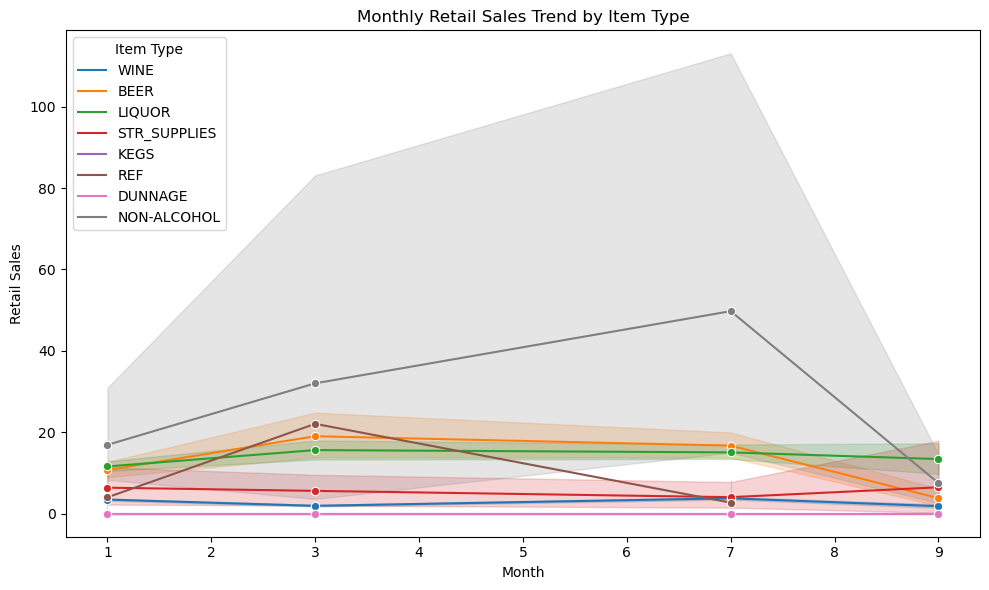

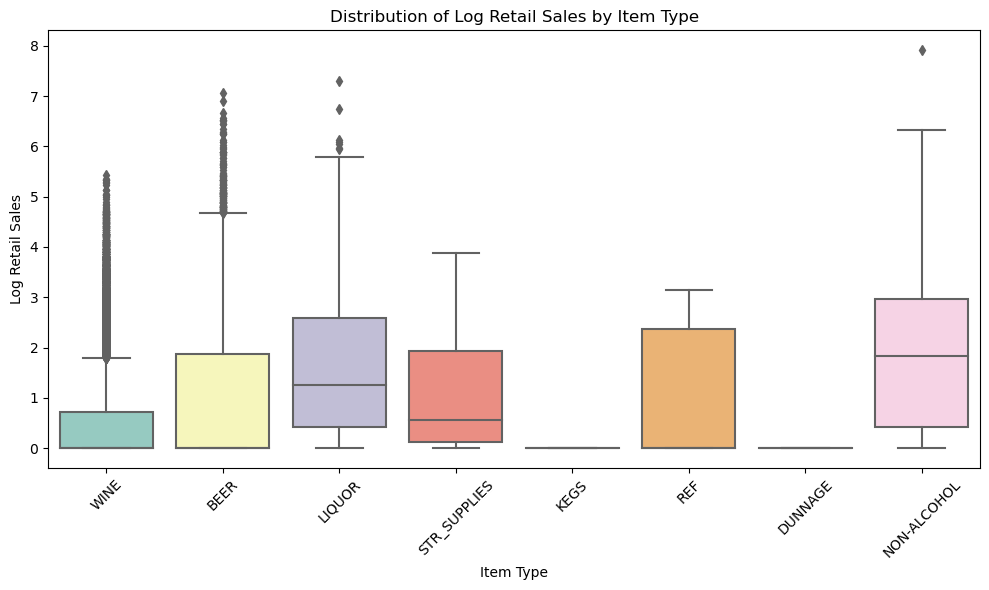

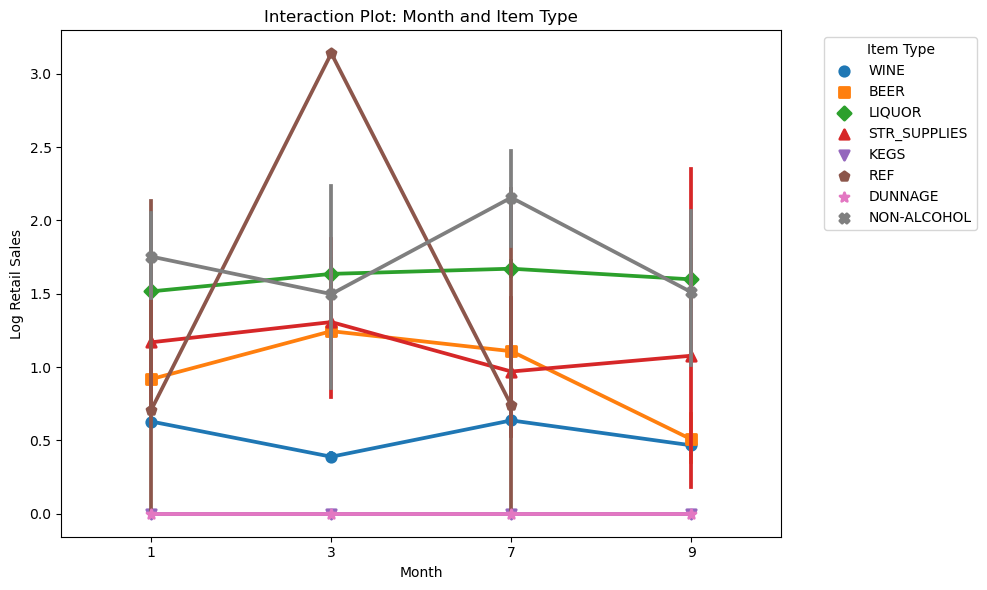

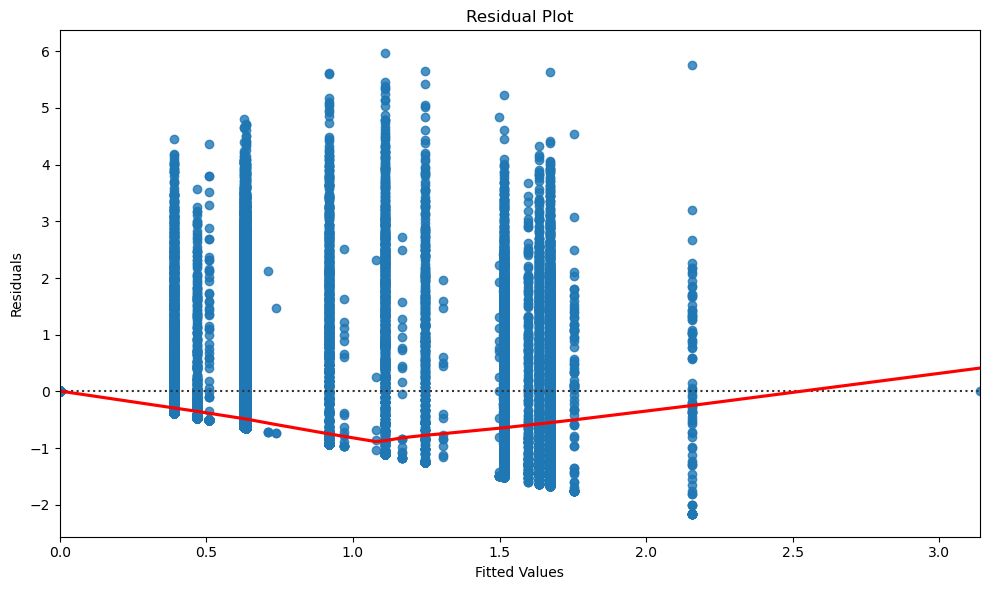

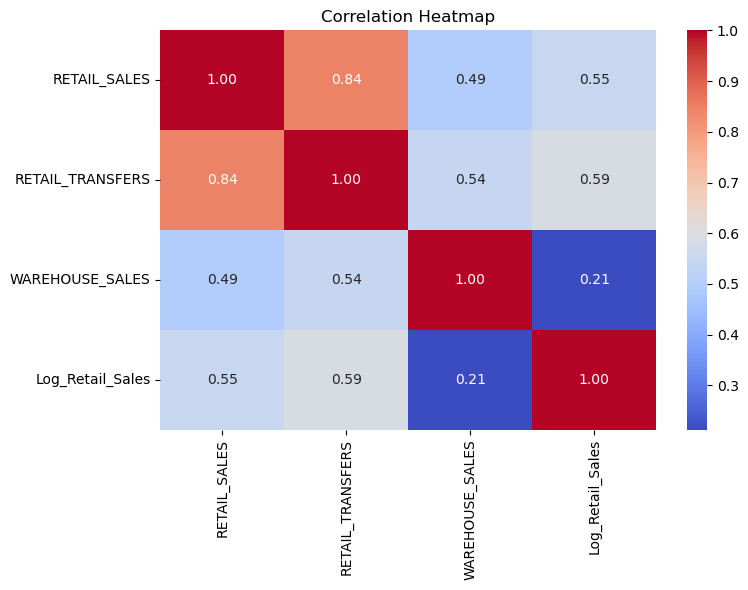

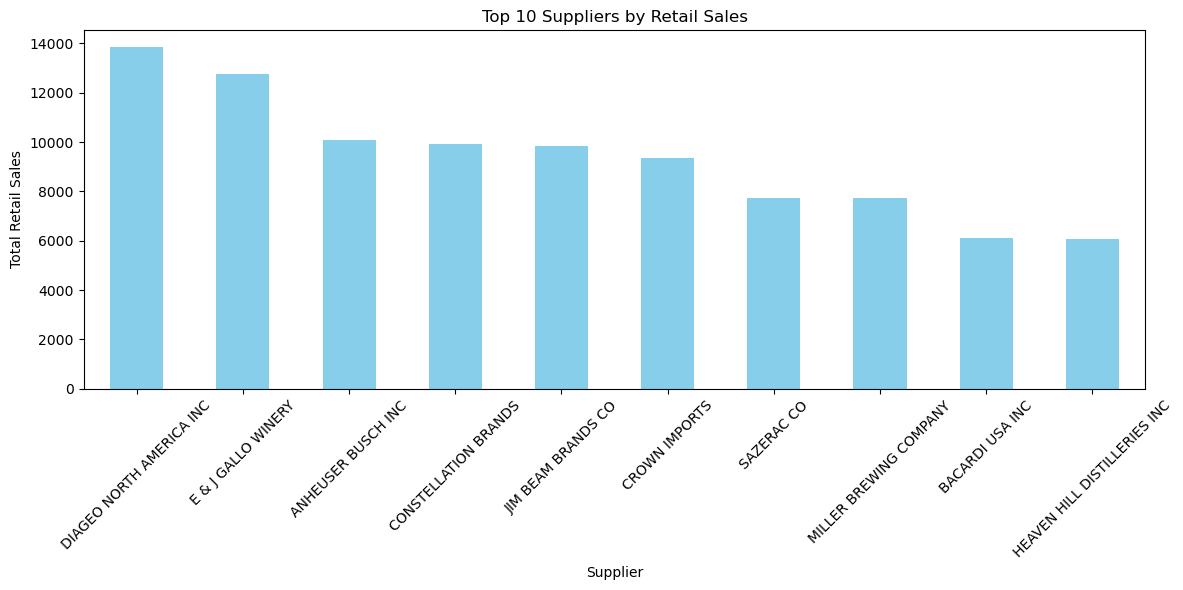

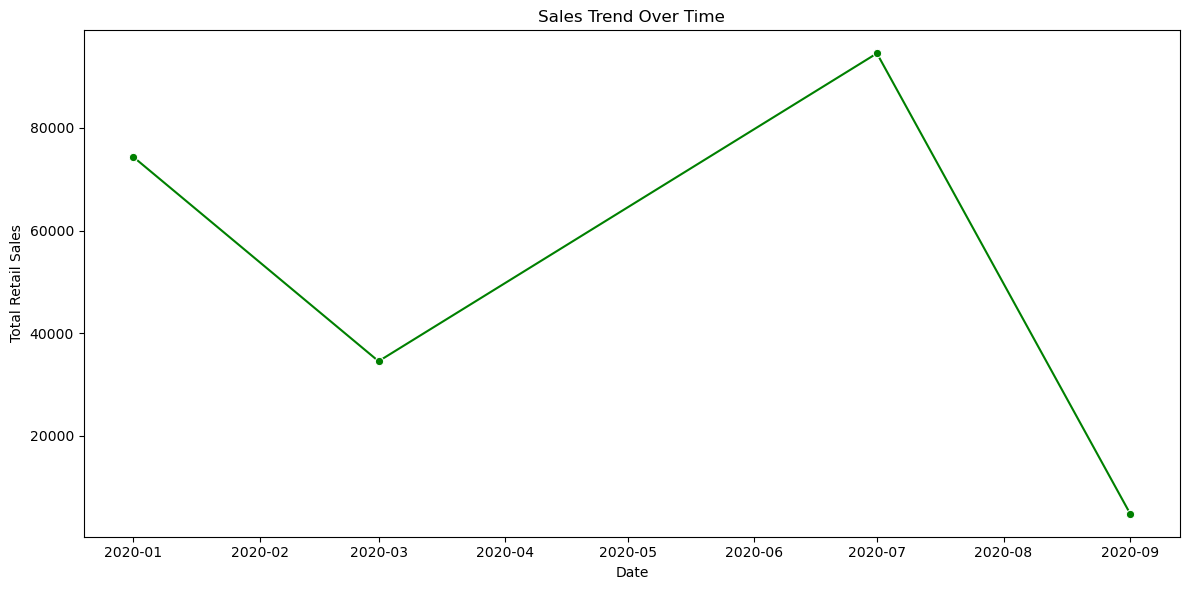

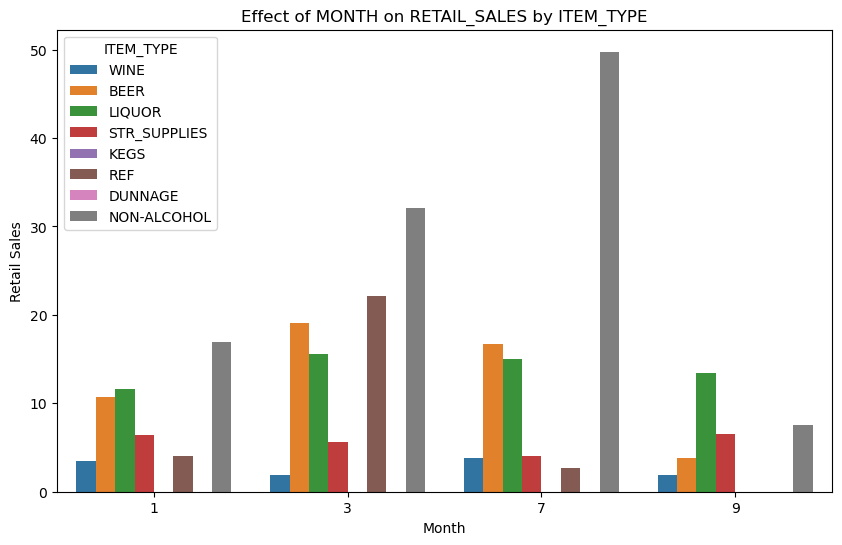

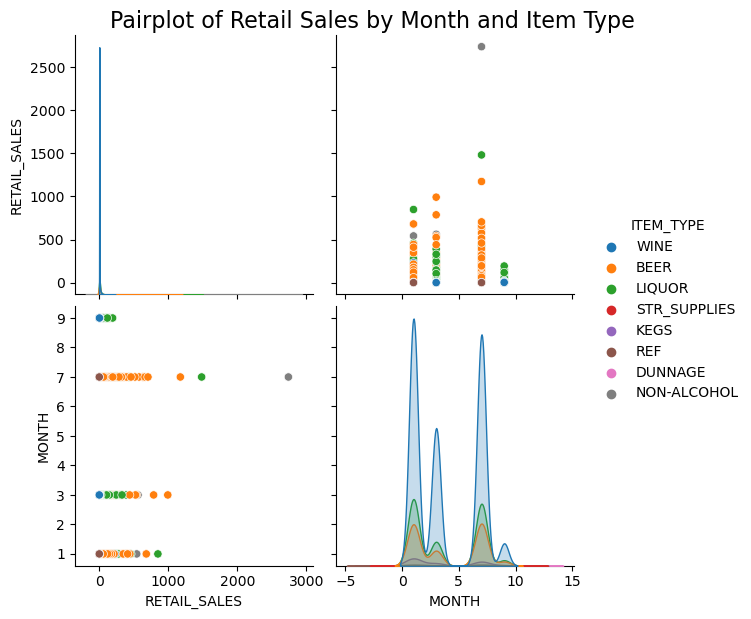

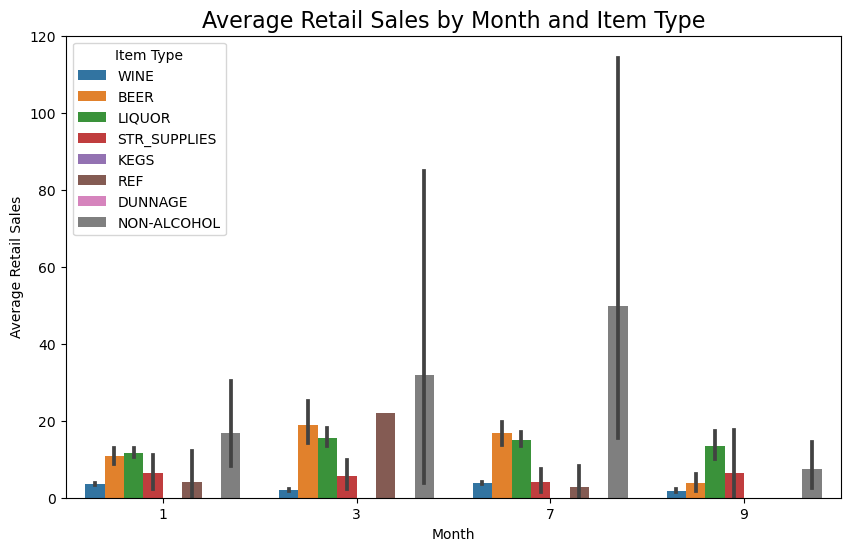

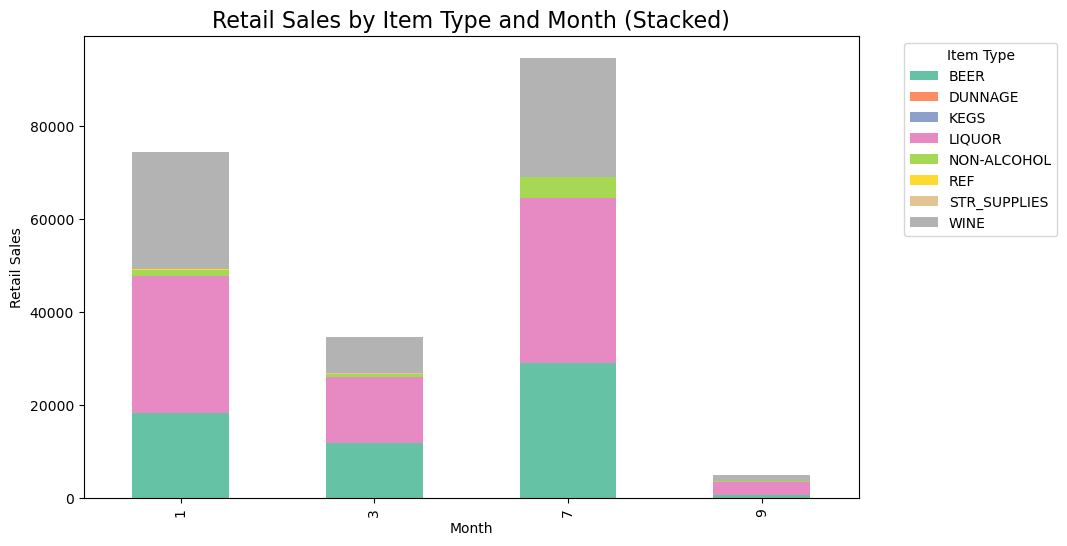

In [3]:

# Visualization
# 1. Monthly Retail Sales Trend by Item Type
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='MONTH', y='RETAIL_SALES', hue='ITEM_TYPE', marker='o')
plt.title("Monthly Retail Sales Trend by Item Type")
plt.xlabel("Month")
plt.ylabel("Retail Sales")
plt.legend(title="Item Type", loc='upper left')
plt.tight_layout()
plt.show()

# 2. Distribution of Log Retail Sales by Item Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ITEM_TYPE', y='Log_Retail_Sales', palette="Set3")
plt.title("Distribution of Log Retail Sales by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Log Retail Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Interaction Plot: Month and Item Type
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='MONTH', y='Log_Retail_Sales', hue='ITEM_TYPE', markers=["o", "s", "D", "^", "v", "p", "*", "X"])
plt.title("Interaction Plot: Month and Item Type")
plt.xlabel("Month")
plt.ylabel("Log Retail Sales")
plt.legend(title="Item Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Residual Plot
residuals = model.resid
fitted = model.fittedvalues
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# Additional Charts
# 5. Heatmap of Correlations
plt.figure(figsize=(8, 6))
correlation = df[sales_columns + ['Log_Retail_Sales']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 6. Retail Sales by Supplier
plt.figure(figsize=(12, 6))
supplier_sales = df.groupby('SUPPLIER')['RETAIL_SALES'].sum().sort_values(ascending=False).head(10)
supplier_sales.plot(kind='bar', color='skyblue')
plt.title("Top 10 Suppliers by Retail Sales")
plt.xlabel("Supplier")
plt.ylabel("Total Retail Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Sales Trend Over Time
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str))
monthly_sales = df.groupby('DATE')['RETAIL_SALES'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='DATE', y='RETAIL_SALES', marker='o', color="green")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Retail Sales")
plt.tight_layout()
plt.show()

# Bar plot: Effect of MONTH on RETAIL_SALES aggregated by ITEM_TYPE
plt.figure(figsize=(10, 6))
sns.barplot(x='MONTH', y='RETAIL_SALES', hue='ITEM_TYPE', data=df, ci=None)
plt.title('Effect of MONTH on RETAIL_SALES by ITEM_TYPE')
plt.xlabel('Month')
plt.ylabel('Retail Sales')
plt.show()



# Pairplot to explore relationships between MONTH, ITEM_TYPE, and RETAIL_SALES
sns.pairplot(df, hue='ITEM_TYPE', vars=['RETAIL_SALES', 'MONTH'], height=3)
plt.suptitle('Pairplot of Retail Sales by Month and Item Type', fontsize=16, y=1.02)
plt.show()


# Bar plot of Average Retail Sales by MONTH and ITEM_TYPE
plt.figure(figsize=(10, 6))
sns.barplot(x='MONTH', y='RETAIL_SALES', hue='ITEM_TYPE', data=df, estimator=np.mean)
plt.title('Average Retail Sales by Month and Item Type', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Retail Sales')
plt.legend(title='Item Type')
plt.show()


# Stacked Bar Plot of Item Type by Month
pivot_table = df.groupby(['MONTH', 'ITEM_TYPE']).agg({'RETAIL_SALES': 'sum'}).reset_index()
pivot_table = pivot_table.pivot(index='MONTH', columns='ITEM_TYPE', values='RETAIL_SALES')

# Plot stacked bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Set2')
plt.title('Retail Sales by Item Type and Month (Stacked)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Retail Sales')
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [4]:
# Model diagnostics and analysis
if anova_results['PR(>F)']['C(MONTH)'] < 0.05:
    print("There is a statistically significant effect of MONTH on RETAIL_SALES.")
else:
    print("There is no significant effect of MONTH on RETAIL_SALES.")

if anova_results['PR(>F)']['C(ITEM_TYPE)'] < 0.05:
    print("There is a statistically significant effect of ITEM_TYPE on RETAIL_SALES.")
else:
    print("There is no significant effect of ITEM_TYPE on RETAIL_SALES.")

if anova_results['PR(>F)']['C(MONTH):C(ITEM_TYPE)'] < 0.05:
    print("There is a statistically significant interaction effect between MONTH and ITEM_TYPE on RETAIL_SALES.")
else:
    print("There is no significant interaction effect between MONTH and ITEM_TYPE on RETAIL_SALES.")



There is a statistically significant effect of MONTH on RETAIL_SALES.
There is a statistically significant effect of ITEM_TYPE on RETAIL_SALES.
There is a statistically significant interaction effect between MONTH and ITEM_TYPE on RETAIL_SALES.


# ------------------------------------------------------------------------